# Sparse Matrix Factorization with Regularization
- $A = P Q$

In [64]:
using Random
using Zygote
using Plots
using SparseArrays

function cost_sp(P, Q, MNA, λ=0.0)
    M, D = size(P)
    _, N = size(Q)
    M_vec, N_vec, A_vec = MNA
    L = length(A_vec)
    J = 0.0
    for l in 1:L
        m, n, a = M_vec[l], N_vec[l], A_vec[l]
        J += (a - P[m,:]' * Q[:,n])^2
    end
    #reg = (sum(P.^2)/M + sum(Q.^2)/N)/D
    reg = (sum(abs.(P))/M + sum(abs.(Q))/N)/D
    J / L + λ * reg   
end

dcost_sp_P(P,Q,MNA) = gradient(x -> cost_sp(x,Q,MNA), P)
dcost_sp_Q(P,Q,MNA) = gradient(x -> cost_sp(P,x,MNA), Q)

function update_sp(P, Q, MNA, N_epoch=100, μ=0.1)
    J_a = zeros(Float32, N_epoch)
    J = cost_sp(P, Q, MNA)
    for i in 1:N_epoch
        dP = dcost_sp_P(P,Q,MNA)[1]
        P -= μ * dP
        dQ = dcost_sp_Q(P,Q,MNA)[1]
        Q -= μ * dQ
        J = cost_sp(P,Q,MNA)
        J_a[i] = J
    end
    P, Q, J_a
end

function train_sp(A_sp, D_featrues, N_epoch=100, μ=0.1)
    M_vec, N_vec, A_vec = findnz(A_sp)
    MNA = (M_vec, N_vec, A_vec)
    
    M, N = size(A_sp)
    τ = 0.01
    P = rand(Float32, M, D_featrues) * τ
    Q = rand(Float32, D_featrues, N) * τ    
    
    update_sp(P, Q, MNA, N_epoch, μ)
end

function main(L=10, N_epoch=1000)
    M, N, L = 4, 4, 10
    A = sparse(rand(1:M,L), rand(1:N,L), rand(Float32,L), M, N)

    function run(D_feature;plot=plot!)
        P, Q, J_a = train_sp(A, D_feature, N_epoch)
        println("Last cost: J=$(J_a[end])")    
        plot(1:N_epoch, J_a)
    end
        
    run(1;plot=plot)
    run(2)    
    run(3)
    f = run(4)
    display(f)    
end

function test(D_feature=2, N_epoch = 1000; train=train_sp)
    M, N, L = 4, 4, 10
    A = sparse(rand(1:M,L), rand(1:N,L), rand(Float32,L), M, N)
    P, Q, J_a = train(A, D_feature, N_epoch)
    J_a[end]
end

# main(10, 1000)
@time test(2, 1000, train=train_sp)
@time test(2, 10000, train=train_sp)

  0.619559 seconds (1.91 M allocations: 89.846 MiB, 4.14% gc time, 66.71% compilation time)
  1.712124 seconds (12.39 M allocations: 489.841 MiB, 8.21% gc time)


1.5027742f-29

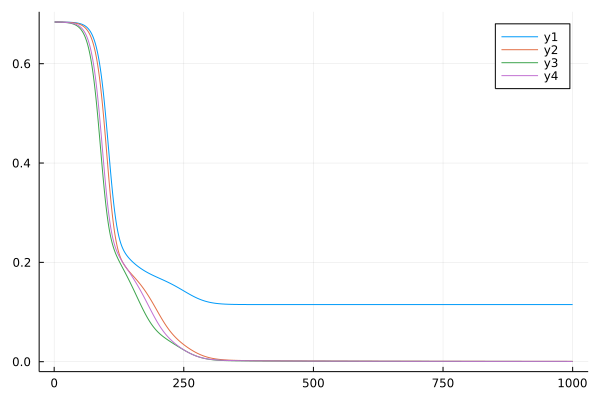

Last cost: J=0.11507079
Last cost: J=0.00068718975
Last cost: J=0.00060442224
Last cost: J=0.0006551391


In [68]:
main(1, 1000)

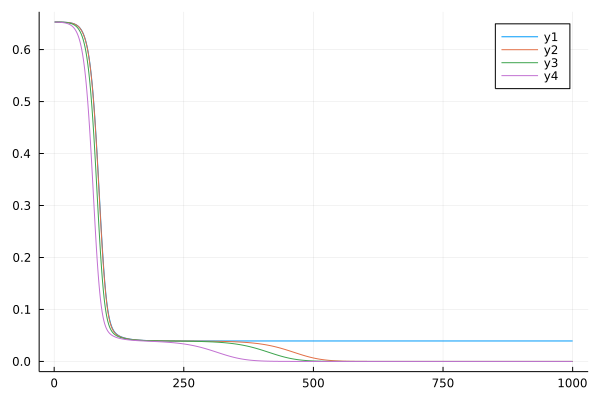

Last cost: J=0.03932683
Last cost: J=9.173263e-13
Last cost: J=3.8802303e-13
Last cost: J=1.2424051e-15


In [67]:
main(2, 1000)

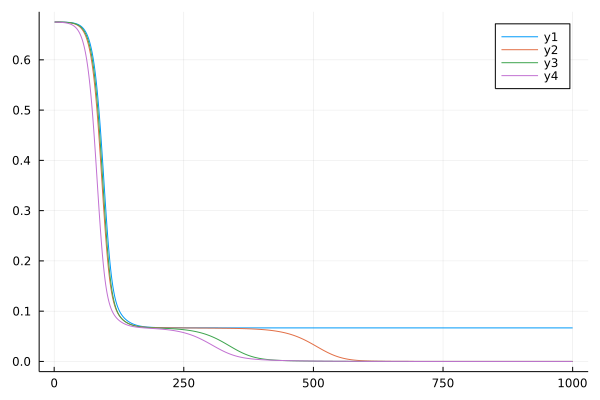

Last cost: J=0.06671574
Last cost: J=3.145868e-8
Last cost: J=8.331744e-8
Last cost: J=5.148915e-7


In [65]:
main(4, 1000)

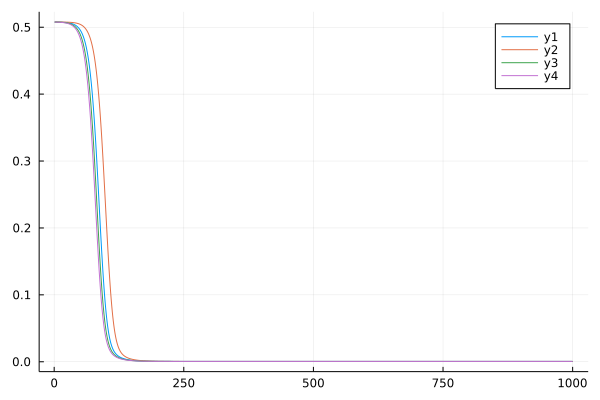

Last cost: J=0.0004615152
Last cost: J=0.00046082496
Last cost: J=0.00046075703
Last cost: J=0.00045281622


In [66]:
main(10, 1000)